In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [93]:
def to_latex(col_names: 'List[str, ...]', cols: 'List[List, ...]', **kwargs) -> str:
    """High-level wrapper of pandas.DataFrame.to_latex with limited options.

    Zips the strings in col_names with the sublists in cols and generates a LaTeX table in string format.

    Args:
        col_names (list[str]): The names of each data column in cols. They will appear in the first row.
        cols (list[list]): Contains lists, each a supposed column of the table.

    Returns:
        str: Latex table.

    Examples:
        >>> names = ['luis', 'pablo']
        >>> cols = [list(range(10)), list(range(10))]
        >>> to_latex(names, cols)
    """
    return pd.DataFrame(dict(zip(col_names, cols))).to_latex(**kwargs)

In [94]:
# 1. Isotherm below the critical temperature

# Estamos cogiendo los valores con la parte de arriba de la burbuja

# Initial temperature = 21.4 C pm 0.1
TMP_ERR = 0.1
# Final temperature at 0.2 ml is 21.6 C

# volumes at ml pm 0.1 ml in analog measurement (0.05 ml)
VOL_ERR = 0.05
# pressures in e5 Pa 1e5 in analog (0.25e5)
PSR_ERR = 0.25

# a partir de 1 tenemos una fina capa que añade error en la medida
# a partir de 0.6 empezamos a tener enttre medio y un ml de liquido encima del mercurio.
volumes = np.array([4, 3.8, 3.6, 3.4, 3.2, 3.0, 2.8, 2.6, 2.4, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])
pressures = np.array([7.0, 7.5, 8.0, 8.5, 9.5, 10, 11, 11.5, 12.5, 13.5, 15, 17, 18.5, 21, 24, 27.5, 29, 31.5, 34, 36.5, 38, 38.5, 39, 40])

print(len(volumes), len(pressures))

24 24


In [95]:
vol_psr = volumes * pressures

print(vol_psr)

[28.  28.5 28.8 28.9 30.4 30.  30.8 29.9 30.  29.7 30.  30.6 29.6 29.4
 28.8 27.5 26.1 25.2 23.8 21.9 19.  15.4 11.7  8. ]


In [96]:
names = ['Volume', 'Pressure']
cols = [volumes, pressures]
print(to_latex(names, cols, index=False))

\begin{tabular}{rr}
\toprule
 Volume &  Pressure \\
\midrule
    4.0 &       7.0 \\
    3.8 &       7.5 \\
    3.6 &       8.0 \\
    3.4 &       8.5 \\
    3.2 &       9.5 \\
    3.0 &      10.0 \\
    2.8 &      11.0 \\
    2.6 &      11.5 \\
    2.4 &      12.5 \\
    2.2 &      13.5 \\
    2.0 &      15.0 \\
    1.8 &      17.0 \\
    1.6 &      18.5 \\
    1.4 &      21.0 \\
    1.2 &      24.0 \\
    1.0 &      27.5 \\
    0.9 &      29.0 \\
    0.8 &      31.5 \\
    0.7 &      34.0 \\
    0.6 &      36.5 \\
    0.5 &      38.0 \\
    0.4 &      38.5 \\
    0.3 &      39.0 \\
    0.2 &      40.0 \\
\bottomrule
\end{tabular}



C:\Users\luisg\AppData\Local\Temp\ipykernel_11756\3650308828.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return pd.DataFrame(dict(zip(col_names, cols))).to_latex(**kwargs)


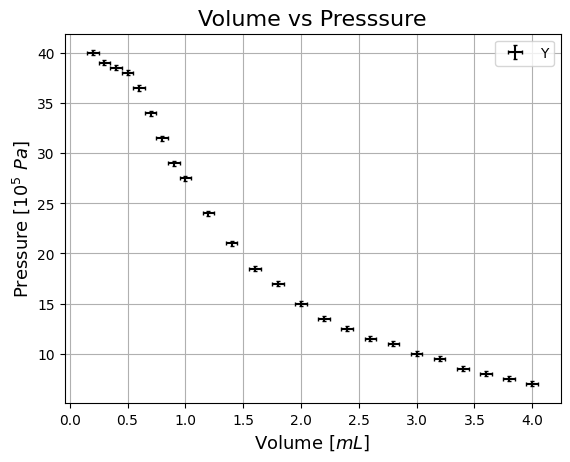

In [97]:
plt.title(r'Volume vs Presssure', fontsize='16')
# plt.plot(volumes, pressures)
# plt.scatter(volumes, pressures)
plt.errorbar(volumes, pressures, yerr=PSR_ERR, xerr=VOL_ERR, ecolor='black', capsize=1.5, linestyle='')
plt.xlabel(r'Volume $[mL]$', fontsize='13')
plt.ylabel(r'Pressure $[10^5 \ Pa]$',fontsize='13')
plt.legend(('YvsX'),loc='best')
plt.grid()
plt.savefig('plot1.png')
plt.show()

In [98]:
def leastsq(x: np.ndarray, y: np.ndarray, sigma: float) -> 'tuple[[float, float], [float, float]]':
    """ Computes the least squares of the 1D vectors x and y.
    Raises:
        ValueError: If the lengths of the arrays are not equal.
        ValueError: If the array x is empty. It is checked after the lengths so y would also be empty.
    Returns:
        tuple((float, float), (float, float)): Returns a tuple containing two tuples.
            The first one contains at position 0 the slope (m in literature) and at position 1 its error.
            The second one contains at position 0 the y-intercept (b in literature) and at position 1 its error.
    """
    n = len(x)

    if n != len(y):
        raise ValueError(f'Length of the data array must be equal, length of x is {n} and y is {len(y)}. Please check. ')

    if n == 0:
        raise ValueError('Arrays cannot be empty. Please check.')

    sum_x, sum_y = np.sum(x), np.sum(y)
    sum_x2 = np.sum(x*x)
    sum_xy = np.sum(x*y)

    div = 1 / (sum_x**2 - n*sum_x2)
    m = (sum_x*sum_y - n*sum_xy) * div
    b = (sum_x*sum_xy - sum_y*sum_x2) * div

    m_e = np.sqrt(n*sigma**2 * (-1) * div)
    b_e = np.sqrt(sum_x2*sigma**2 * (-1) * div)

    return (m, m_e), (b, b_e)

In [99]:
# 2. Measurements at constant Volume

# En estas medidas la valvula de la presion se ha ido abriendo
temperatures = (21.6, 23.6, 24.6, 25.6, 26.6, 27.6, 28.6, 29.6, 30.6, 31.6, 32.6)
pressures = (38, 39, 39.5, 39.5, 40, 40, 40.5, 41, 41, 41.5, 42)

In [100]:
log_p = np.array(pressures)
log_p = log_p * 1e5
log_p = np.log(log_p)

inv_temp = np.array(temperatures)
inv_temp = inv_temp + 273
inv_temp = 1 / inv_temp

In [101]:
print('(m, m_e), (b, b_e)', leastsq(inv_temp, log_p, sigma=0.01))

(m, m_e), (b, b_e) ((-748.0800478472153, 81.97173888651236), (17.695633622160187, 0.2728261602020901))


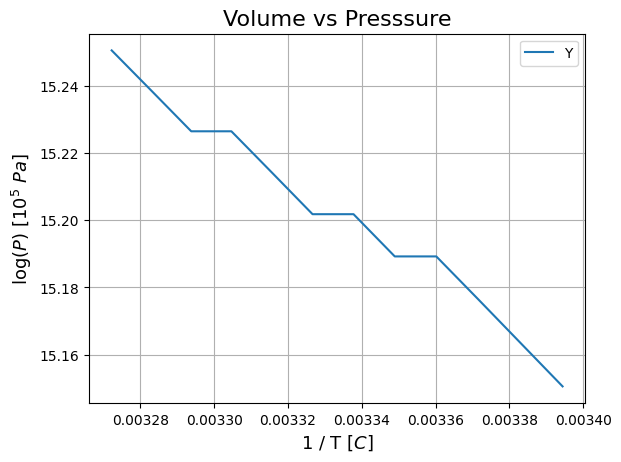

In [102]:
plt.title(r'Volume vs Presssure', fontsize='16')
plt.plot(inv_temp, log_p)
# plt.errorbar(log_p, inv_temp, yerr=PSR_ERR, xerr=VOL_ERR, ecolor='black', capsize=1.5, linestyle='-',)
plt.xlabel(r'1 / T $[C]$', fontsize='13')
plt.ylabel(r'$\log(P) \ [10^5 \ Pa]$',fontsize='13')
plt.legend(('YvsX'),loc='best')
# plt.savefig('Y_X.png
plt.grid()
plt.show()

In [103]:
# Estos son los datos buenos

temperatures = (18.1, 19.1, 20.1, 21.1, 22.1, 23.1, 24.1, 25.1, 26.1, 27.1, 28.1, 29.1, 30.1, 31.1, 32.1)
pressures = np.array([35, 35.5, 36.5, 37, 38.5, 38, 38.5, 39, 40, 41, 41, 41.5, 42, 42.5, 43])

print(len(temperatures), len(pressures))

15 15


In [104]:
names = ['Temperature', 'Pressure']
cols = [temperatures, pressures]
print(to_latex(names, cols, index=False))

\begin{tabular}{rr}
\toprule
 Temperature &  Pressure \\
\midrule
        18.1 &      35.0 \\
        19.1 &      35.5 \\
        20.1 &      36.5 \\
        21.1 &      37.0 \\
        22.1 &      38.5 \\
        23.1 &      38.0 \\
        24.1 &      38.5 \\
        25.1 &      39.0 \\
        26.1 &      40.0 \\
        27.1 &      41.0 \\
        28.1 &      41.0 \\
        29.1 &      41.5 \\
        30.1 &      42.0 \\
        31.1 &      42.5 \\
        32.1 &      43.0 \\
\bottomrule
\end{tabular}



C:\Users\luisg\AppData\Local\Temp\ipykernel_11756\3650308828.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return pd.DataFrame(dict(zip(col_names, cols))).to_latex(**kwargs)


In [105]:
log_p = np.array(pressures)
log_p = log_p * 1e5
log_p = np.log(log_p)

inv_temp = np.array(temperatures)
inv_temp = inv_temp + 273
inv_temp = 1 / inv_temp

sigma = np.sum(inv_temp**2 * TMP_ERR) / len(inv_temp)

In [106]:
# Esto viene de la propagacion de errores

log_psr_err = 1 / pressures * PSR_ERR
inv_temp_err = inv_temp ** 2 * TMP_ERR

In [107]:
ms, bs = leastsq(inv_temp, log_p, sigma=sigma)
m, m_e = ms
b, b_e = bs
print('(m, m_e), (b, b_e)', ms, bs)

(m, m_e), (b, b_e) (-1289.478570176725, 0.0059771679919968235) (19.507869922369487, 2.005720301589638e-05)


In [108]:
print(inv_temp)
print(log_p)

[0.00343525 0.00342349 0.0034118  0.0034002  0.00338868 0.00337724
 0.00336587 0.00335458 0.00334336 0.00333222 0.00332116 0.00331016
 0.00329924 0.00328839 0.00327761]
[15.06827353 15.08245816 15.11023773 15.12384338 15.16358371 15.15051162
 15.16358371 15.17648711 15.20180492 15.22649753 15.22649753 15.23861889
 15.25059508 15.26242954 15.27412558]


In [109]:
R = 8.31446261815324  # J⋅mol^−1⋅K^−1

H_vap = - m * R
H_vap_err = R * m_e

print(H_vap, H_vap_err)

10721.321368644069 0.04969693983187965


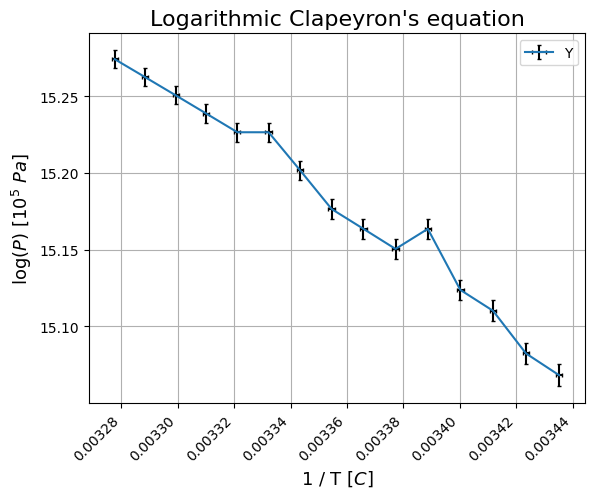

In [110]:
plt.title(r"Logarithmic Clapeyron's equation", fontsize='16')
plt.errorbar(inv_temp, log_p, yerr=log_psr_err, xerr=inv_temp_err, ecolor='black', capsize=1.5, linestyle='-',)
plt.xlabel(r'1 / T $[C]$', fontsize='13')
plt.ylabel(r'$\log(P) \ [10^5 \ Pa]$',fontsize='13')
plt.xticks(rotation=45, ha="right")
plt.legend(('YvsX'),loc='best')
plt.grid()
plt.show()

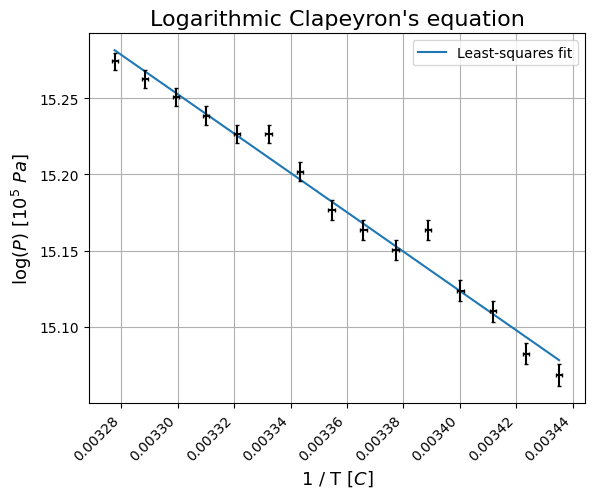

In [111]:
plt.title(r"Logarithmic Clapeyron's equation", fontsize='16')

plt.plot(inv_temp, inv_temp * m + b, label='Least-squares fit')

plt.errorbar(inv_temp, log_p, yerr=log_psr_err, xerr=inv_temp_err, ecolor='black', capsize=1.5, linestyle='',)

plt.xlabel(r'1 / T $[C]$', fontsize='13')
plt.ylabel(r'$\log(P) \ [10^5 \ Pa]$',fontsize='13')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid()
plt.show()

In [112]:
# La temp a la que está ahora es 32.4 C


volumes = (4, 3.8, 3.6, 3.4, 3.2, 3.0, 2.8, 2.6, 2.4, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.8, 0.6, 0.4)
pressures = (8, 8, 8.5, 9.0, 10, 10.5, 11.5, 12.5, 13.5, 14.5, 16, 18, 20, 22.5, 25.5, 29.5, 34, 41, 47.5)


print(len(volumes), len(pressures))

19 19


In [113]:
names = ['Volume', 'Pressure']
cols = [volumes, pressures]
print(to_latex(names, cols, index=False))

\begin{tabular}{rr}
\toprule
 Volume &  Pressure \\
\midrule
    4.0 &       8.0 \\
    3.8 &       8.0 \\
    3.6 &       8.5 \\
    3.4 &       9.0 \\
    3.2 &      10.0 \\
    3.0 &      10.5 \\
    2.8 &      11.5 \\
    2.6 &      12.5 \\
    2.4 &      13.5 \\
    2.2 &      14.5 \\
    2.0 &      16.0 \\
    1.8 &      18.0 \\
    1.6 &      20.0 \\
    1.4 &      22.5 \\
    1.2 &      25.5 \\
    1.0 &      29.5 \\
    0.8 &      34.0 \\
    0.6 &      41.0 \\
    0.4 &      47.5 \\
\bottomrule
\end{tabular}



C:\Users\luisg\AppData\Local\Temp\ipykernel_11756\3650308828.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return pd.DataFrame(dict(zip(col_names, cols))).to_latex(**kwargs)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


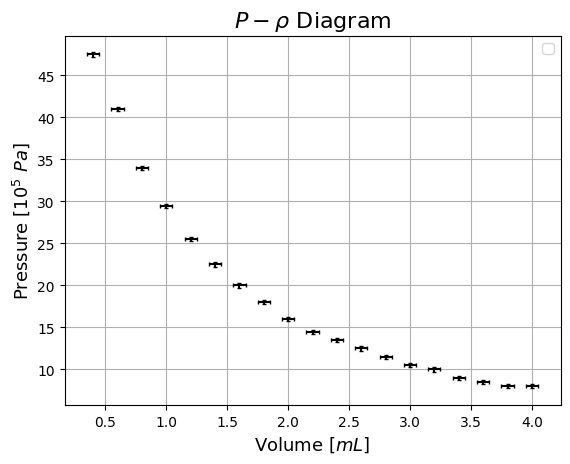

In [114]:
plt.title(r'$P - \rho $ Diagram', fontsize='16')
# plt.plot(volumes, pressures)
# plt.scatter(volumes, pressures)
plt.errorbar(volumes, pressures, yerr=PSR_ERR, xerr=VOL_ERR, ecolor='black', capsize=1.5, linestyle='')
plt.xlabel(r'Volume $[mL]$', fontsize='13')
plt.ylabel(r'Pressure $[10^5 \ Pa]$',fontsize='13')
plt.legend()
plt.grid()
plt.savefig('plot_pv_q3.png')
plt.show()

[Aquí](https://webbook.nist.gov/cgi/cbook.cgi?ID=C74840&Mask=4) hay info to pepino

In [115]:


TC_THEO = 305.4  # K
VC_THEO = 0.147  # L
PC_THEO = 49  # bar